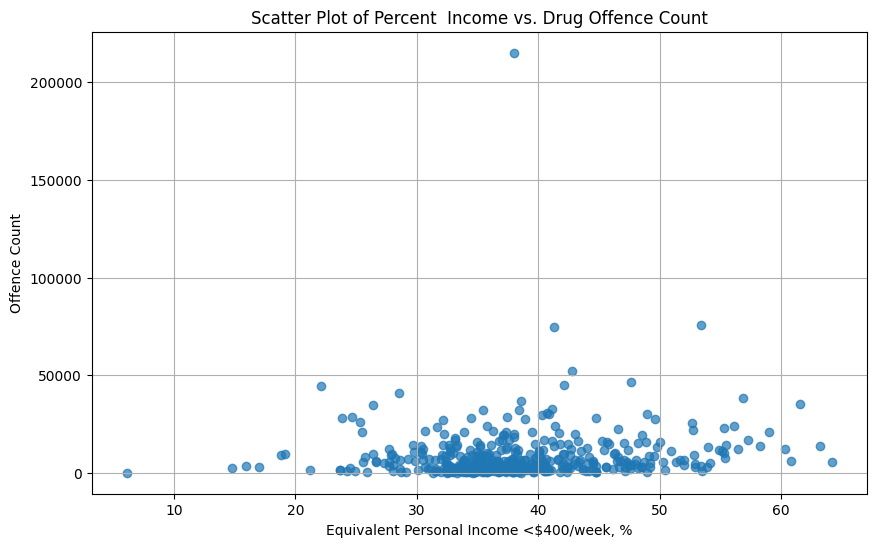

Correlation coefficient between Personal income <$400/week, % and Offence Count: 0.1200


In [43]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def extract_suburb_type(community_name):
    regex_pattern = r'\((Suburb|suburb)\)'
    matches = re.findall(regex_pattern, community_name)
    return matches[0] if matches else None

def suburb_incomes_vs_drug_offences():
    # Load communities data
    communities_df = pd.read_csv('imputed_data_communities.csv')
    communities_df['Type'] = communities_df['Community Name'].apply(extract_suburb_type)
    suburbs_df = communities_df[communities_df['Type'] == 'Suburb'].copy()
    percent_household_income_col = 'Equivalent household income <$600/week, %'
    percent_personal_income_col = 'Personal income <$400/week, %'
    suburbs_df = suburbs_df[['Community Name', percent_household_income_col, percent_personal_income_col]]
    
    # Load drug offences data
    suburb_drug_offences_df = pd.read_excel('LGA Offences.xlsx', sheet_name='Table 03')
    
    # Strip leading and trailing spaces and convert to lowercase
    suburbs_df['Community Name'] = suburbs_df['Community Name'].str.replace(r' \((Suburb|suburb)\)', '', regex=True).str.strip().str.lower()
    suburb_drug_offences_df['Suburb/Town Name'] = suburb_drug_offences_df['Suburb/Town Name'].str.strip().str.lower()
    
    # Group by suburb and sum offence counts
    suburb_drug_offenses_grouped = suburb_drug_offences_df.groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()
    
    # Merge datasets
    merged_df = pd.merge(suburbs_df, suburb_drug_offenses_grouped, left_on='Community Name', right_on='Suburb/Town Name', how='inner')
    merged_df['Community Name'] = merged_df['Community Name'].str.upper()
    merged_df = merged_df.drop(columns=['Suburb/Town Name'])
    
    # Save the merged dataset to a new CSV file
    merged_df.to_csv('merged_suburb_incomes_drug_offenses.csv', index=False)

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df[percent_personal_income_col], merged_df['Offence Count'], alpha=0.7)
    plt.title('Scatter Plot of Percent  Income vs. Drug Offence Count')
    plt.xlabel('Equivalent Personal Income <$400/week, %')
    plt.ylabel('Offence Count')
    plt.grid(True)
    plt.show()

      # Calculate correlation coefficient
    correlation = merged_df[percent_personal_income_col].corr(merged_df['Offence Count'])
    print(f"Correlation coefficient between {percent_personal_income_col} and Offence Count: {correlation:.4f}")

    return

# Call the function to execute
suburb_incomes_vs_drug_offences()

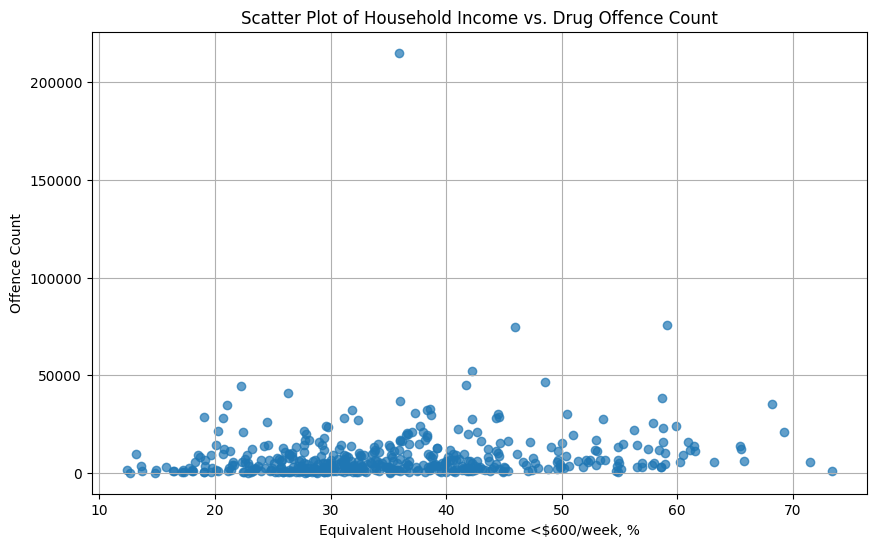

Correlation coefficient between Equivalent household income <$600/week, % and Offence Count: 0.1531


In [45]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def extract_suburb_type(community_name):
    regex_pattern = r'\((Suburb|suburb)\)'
    matches = re.findall(regex_pattern, community_name)
    return matches[0] if matches else None

def suburb_incomes_vs_drug_offences():
    # Load communities data
    communities_df = pd.read_csv('imputed_data_communities.csv')
    communities_df['Type'] = communities_df['Community Name'].apply(extract_suburb_type)
    suburbs_df = communities_df[communities_df['Type'] == 'Suburb'].copy()
    percent_household_income_col = 'Equivalent household income <$600/week, %'
    percent_personal_income_col = 'Personal income <$400/week, %'
    suburbs_df = suburbs_df[['Community Name', percent_household_income_col, percent_personal_income_col]]
    
    # Load drug offences data
    suburb_drug_offences_df = pd.read_excel('LGA Offences.xlsx', sheet_name='Table 03')
    
    # Strip leading and trailing spaces and convert to lowercase
    suburbs_df['Community Name'] = suburbs_df['Community Name'].str.replace(r' \((Suburb|suburb)\)', '', regex=True).str.strip().str.lower()
    suburb_drug_offences_df['Suburb/Town Name'] = suburb_drug_offences_df['Suburb/Town Name'].str.strip().str.lower()
    
    # Group by suburb and sum offence counts
    suburb_drug_offenses_grouped = suburb_drug_offences_df.groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()
    
    # Merge datasets
    merged_df = pd.merge(suburbs_df, suburb_drug_offenses_grouped, left_on='Community Name', right_on='Suburb/Town Name', how='inner')
    merged_df['Community Name'] = merged_df['Community Name'].str.upper()
    merged_df = merged_df.drop(columns=['Suburb/Town Name'])
    
    # Save the merged dataset to a new CSV file
    merged_df.to_csv('merged_suburb_incomes_drug_offenses.csv', index=False)

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df[percent_household_income_col], merged_df['Offence Count'], alpha=0.7)
    plt.title('Scatter Plot of Household Income vs. Drug Offence Count')
    plt.xlabel('Equivalent Household Income <$600/week, %')
    plt.ylabel('Offence Count')
    plt.grid(True)
    plt.show()

      # Calculate correlation coefficient
    correlation = merged_df[percent_household_income_col].corr(merged_df['Offence Count'])
    print(f"Correlation coefficient between {percent_household_income_col} and Offence Count: {correlation:.4f}")

    return

# Call the function to execute
suburb_incomes_vs_drug_offences()